# Chapter 5 Coastal Engineering: Forces on Piles

1. [Introduction: Forces on Structure](#1.-Introduction)
2. [Simulation: Forces on Slender Piles](#2.-Simulation)
3. [Simulation: Intereative Force Calculator](#3.-Simulation)
4. [Self-Assessment](#4.-Self-Assessment)

## 1. Introduction 

### Morison Equation for Forces on Slender Piles

The **Morison Equation** is a semi-empirical formulation used to estimate the hydrodynamic force exerted by oscillatory flow (from waves or currents) on slender cylindrical members such as piles or risers. It's especially valid when the **pile diameter is much smaller than the incident wavelength**, so diffraction effects are negligible.

In offshore and coastal engineering, understanding the interaction between ocean waves and structural elements is critical for ensuring safety and reliability. When dealing with slender cylindrical structures—such as piles, piers, or offshore platforms—the Morison equation provides a practical framework for estimating hydrodynamic forces induced by wave action.

The Morison equation is particularly effective when the diameter of the pile is small relative to the incident wavelength (i.e., when the structure is "slender"), allowing simplification of complex fluid dynamics into an additive formulation of inertia and drag components. These two primary components represent:

Inertia force, due to the acceleration of the fluid mass surrounding the pile.

Drag force, resulting from the velocity of fluid flow past the pile and the associated pressure differential.

This approach assumes that wave-structure interaction does not significantly alter the wave field—a valid assumption for slender elements—and is widely employed in both preliminary design and detailed analyses of marine structures.

---

##### Morison Equation

$$
F(t) = \underbrace{\frac{\pi}{4} \rho D^2 C_m \frac{dU}{dt}}_{\text{Inertia Force}} + \underbrace{\frac{1}{2} \rho D C_d U |U|}_{\text{Drag Force}}
$$

Where:
- $( F(t) $): Total horizontal force per unit length (N/m)
- $( \rho $): Water density (kg/m³)
- $( D $): Pile diameter (m)
- $( C_d $): Drag coefficient (dimensionless)
- $( C_m $): Inertia coefficient (dimensionless, includes added mass)
- $( U(t) $): Water particle velocity (m/s)
- $( \frac{dU}{dt} $): Water particle acceleration (m/s²)


##### Inertia Force:
Proportional to **acceleration** of the fluid. Dominates in **low Reynolds number** or small body scenarios.

$$
F_\text{inertia} = \frac{\pi}{4} \rho D^2 C_m \frac{dU}{dt}
$$

##### Drag Force:
Proportional to **velocity squared**. Dominates at higher velocities and larger diameters.

$$
F_\text{drag} = \frac{1}{2} \rho D C_d U |U|
$$

---

##### Typical Coefficient Values

| Coefficient | Description             | Typical Range |
|------------|-------------------------|----------------|
| $( C_d $)   | Drag coefficient         | 0.6–1.2 (varies with shape and flow regime) |
| $( C_m $)   | Inertia coefficient      | 1.8–2.0 (includes added mass) |

---


### ✅ Notes and Corrections

- Ensure consistent units (SI or Imperial).
- Use time-varying velocity and acceleration profiles for dynamic analysis.
- For multiple piles or pile groups, apply interaction corrections and velocity field adjustments.
- Figures and equations referenced are from the **Shore Protection Manual (SPM)**.


### ✅ Notes and Corrections

- Ensure consistent units (SI or Imperial).
- Use time-varying velocity and acceleration profiles for dynamic analysis.
- For multiple piles or pile groups, apply interaction corrections and velocity field adjustments.
- Figures and equations referenced are from the **Shore Protection Manual (SPM)**.


## 2. Simulation

### 🌊 Wave-Induced Forces on Coastal Piles — Morison vs. SPM Design Comparison

This Python script models and compares **wave forces and moments** acting on a slender vertical pile using:

- **Morison Equation** — time-varying forces from drag and inertia
- **SPM Method (Shore Protection Manual)** — empirical static estimates for force and moment

---

### 🧠 What It Does

### 💡 Morison Equation (Dynamic Analysis)
- Models force components:
  - **Drag**: depends on velocity and pile diameter
  - **Inertia**: depends on water acceleration
- Calculates:
  - Time series of **total force per unit length**
- Visualizes drag, inertia, and combined effects over time

### 💡 SPM Estimation (Static Design Values)
- Uses wave height (H), water depth (h), and coefficients (Cf, Cm)
- Outputs:
  - **Total horizontal wave force (F_spm)**
  - **Overturning moment at seabed (M_spm)**

---

### 🎛️ Inputs

| Parameter | Description                     |
|----------|---------------------------------|
| `rho`    | Seawater density (kg/m³)        |
| `D`      | Pile diameter (m)               |
| `Cd, Cm` | Drag and inertia coefficients   |
| `A`      | Wave velocity amplitude (m/s)   |
| `T`      | Wave period (s)                 |
| `H`      | Wave height for SPM (m)         |
| `h`      | Water depth (m)                 |

---

### 📊 Outputs & Interpretation

| Method      | Output                     | Interpretation |
|-------------|----------------------------|----------------|
| **Morison** | Time-dependent force (N/m) | Captures dynamic loading across wave cycle |
| **SPM**     | Force (N), Moment (Nm)     | Simplified estimates for design sizing |

- 📈 Morison force plot shows how inertia dominates near wave peaks and drag near velocity shifts
- 🧮 SPM values provide conservative approximations for pile sizing and stability checks

---

> _Use Morison for dynamic load analysis, especially for slender marine piles. Use SPM for quick sizing and early-stage design._


C:\Users\satis\AppData\Local\Temp\ipykernel_34316\427159378.py:33: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


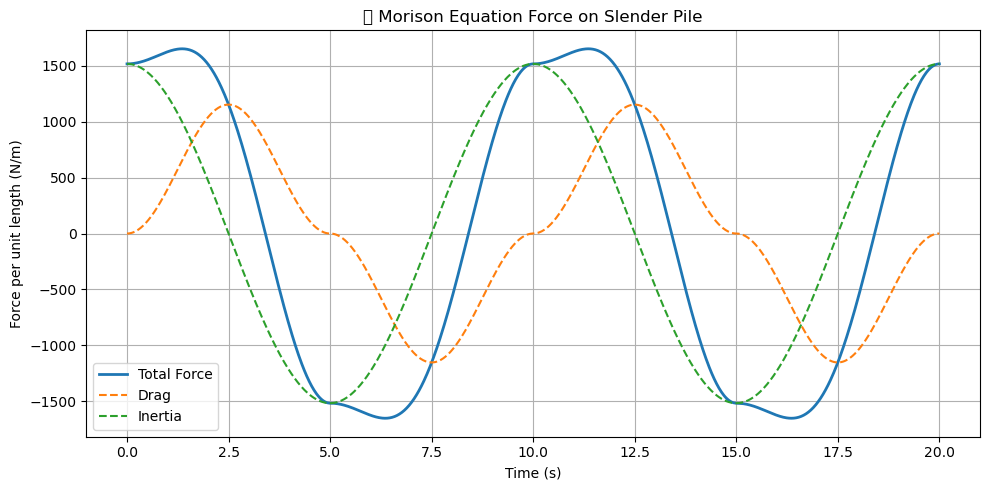

🌊 SPM-based Design Estimates
Estimated Wave Force (F): 61588.4 N
Estimated Moment at Seabed (M): 369530.4 Nm


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Morison Parameters ---
rho = 1025            # kg/m³ (seawater)
D = 1.0               # Pile diameter (m)
Cd = 1.0              # Drag coefficient
Cm = 2.0              # Inertia coefficient
A = 1.5               # Velocity amplitude (m/s)
T = 10                # Wave period (s)
omega = 2 * np.pi / T # Angular frequency
t = np.linspace(0, 20, 1000)

# Velocity and acceleration
U = A * np.sin(omega * t)
dUdt = A * omega * np.cos(omega * t)

# Morison forces per unit length
F_inertia = (np.pi / 4) * rho * D**2 * Cm * dUdt
F_drag = 0.5 * rho * D * Cd * U * np.abs(U)
F_morison = F_inertia + F_drag

# Plot Morison force
plt.figure(figsize=(10, 5))
plt.plot(t, F_morison, label='Total Force', lw=2)
plt.plot(t, F_drag, '--', label='Drag')
plt.plot(t, F_inertia, '--', label='Inertia')
plt.title("🌊 Morison Equation Force on Slender Pile")
plt.xlabel("Time (s)")
plt.ylabel("Force per unit length (N/m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- SPM Force & Moment Estimate ---
H = 3.5     # Wave height (m)
h = 10      # Water depth (m)
Cf = 1.0    # Force coefficient (SPM)
Cm_spm = 0.3  # Moment coefficient (SPM)

F_spm = Cf * 0.5 * rho * 9.81 * H**2         # Total horizontal force
M_spm = Cm_spm * rho * 9.81 * H**2 * h       # Overturning moment at seabed

print("🌊 SPM-based Design Estimates")
print(f"Estimated Wave Force (F): {F_spm:.1f} N")
print(f"Estimated Moment at Seabed (M): {M_spm:.1f} Nm")

## 3. Simulation

### 🌊 Interactive Coastal Pile Force Simulator — Morison vs. SPM Methods

This Jupyter-based tool estimates and compares **wave-induced forces and overturning moments** on vertical coastal piles using two classic engineering approaches:

---

### 🧠 What It Does

- **Morison Equation (Dynamic):**
  - Time-varying force decomposition into:
    - **Drag force** (velocity-dependent)
    - **Inertia force** (acceleration-dependent)
  - Computes and plots per-unit-length force over time

- **SPM Method (Static):**
  - Empirical estimation of:
    - Total horizontal wave force
    - Seabed moment from wave impact

---

### 🎛️ User Inputs (via sliders)

| Parameter | Description                      |
|----------|----------------------------------|
| `H`      | Wave height (m)                  |
| `T`      | Wave period (s)                  |
| `D`      | Pile diameter (m)                |
| `Cd`     | Drag coefficient                 |
| `Cm`     | Inertia coefficient              |
| `h`      | Water depth (m)                  |

---

### 📊 Outputs

- 📈 Time series plot of:
  - Total force
  - Drag component
  - Inertia component

- 🧮 Summary table:
  - Peak drag, inertia, and total forces (Morison)
  - Static wave force and moment (SPM)

---

### 🧭 How to Interpret Results

- Use **Morison** outputs to assess dynamic load cycles and fatigue risk
- Use **SPM** values for conservative design estimates of static loading
- Higher wave height, longer periods, and larger diameters yield greater forces and moments
- Comparing both methods helps balance simplicity vs. physical accuracy

> _Ideal for coastal engineers evaluating wave-structure interaction under varying sea states and design scenarios._


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Morison and SPM Functions ---
def compute_morison_forces(rho, D, Cd, Cm, A, omega, t):
    U = A * np.sin(omega * t)
    dUdt = A * omega * np.cos(omega * t)
    F_drag = 0.5 * rho * D * Cd * U * np.abs(U)
    F_inertia = (np.pi / 4) * rho * D**2 * Cm * dUdt
    F_total = F_drag + F_inertia
    return F_drag, F_inertia, F_total

def compute_spm_force_moment(H, h, rho=1025, g=9.81, Cf=1.0, Cm_spm=0.3):
    F = Cf * 0.5 * rho * g * H**2
    M = Cm_spm * rho * g * H**2 * h
    return F, M

# --- Update function ---
def update(H, D, Cd, Cm, T, h):
    clear_output(wait=True)

    rho = 1025
    g = 9.81
    omega = 2 * np.pi / T
    A = H / 2               # Approximate velocity amplitude
    t = np.linspace(0, 2*T, 1000)

    # Morison Forces
    F_drag, F_inertia, F_total = compute_morison_forces(rho, D, Cd, Cm, A, omega, t)
    peak_F_total = np.max(np.abs(F_total))
    peak_F_drag = np.max(np.abs(F_drag))
    peak_F_inertia = np.max(np.abs(F_inertia))

    # SPM Forces
    F_spm, M_spm = compute_spm_force_moment(H, h, rho=rho, g=g)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(t, F_total, label='Total Force', lw=2)
    plt.plot(t, F_drag, '--', label='Drag Force', color='orange')
    plt.plot(t, F_inertia, '--', label='Inertia Force', color='green')
    plt.title("⏱️ Time History of Morison Force Components")
    plt.xlabel("Time (s)")
    plt.ylabel("Force per unit length (N/m)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Summary Table
    print(f"📊 **Summary for Inputs:**")
    print(f"- Wave Height (H): {H:.2f} m")
    print(f"- Wave Period (T): {T:.2f} s")
    print(f"- Pile Diameter (D): {D:.2f} m")
    print(f"- Water Depth (h): {h:.1f} m")
    print(f"- Cd: {Cd:.2f}, Cm: {Cm:.2f}")

    print("\n🌀 **Morison Equation Results**")
    print(f"- Peak Total Force:   {peak_F_total:,.1f} N/m")
    print(f"- Peak Drag Force:    {peak_F_drag:,.1f} N/m")
    print(f"- Peak Inertia Force: {peak_F_inertia:,.1f} N/m")

    print("\n📏 **SPM Estimates**")
    print(f"- Estimated Total Force:  {F_spm:,.1f} N")
    print(f"- Estimated Moment @ Seabed: {M_spm:,.1f} Nm")

# --- Widgets ---
slider_H = widgets.FloatSlider(value=3.5, min=0.5, max=8.0, step=0.1, description='H (m)')
slider_T = widgets.FloatSlider(value=10.0, min=4.0, max=20.0, step=0.5, description='T (s)')
slider_D = widgets.FloatSlider(value=1.0, min=0.2, max=3.0, step=0.1, description='D (m)')
slider_Cd = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Cd')
slider_Cm = widgets.FloatSlider(value=2.0, min=1.0, max=3.0, step=0.1, description='Cm')
slider_h = widgets.FloatSlider(value=10.0, min=2.0, max=30.0, step=1.0, description='Depth h (m)')

ui = widgets.VBox([
    widgets.HTML("<h3>🌊 Morison + SPM Force and Moment Explorer</h3>"),
    widgets.HBox([slider_H, slider_T, slider_D]),
    widgets.HBox([slider_Cd, slider_Cm, slider_h])
])

# Interactive output
output = widgets.interactive_output(update, {
    'H': slider_H,
    'T': slider_T,
    'D': slider_D,
    'Cd': slider_Cd,
    'Cm': slider_Cm,
    'h': slider_h
})

display(ui, output)


Output()

## 4. Self-Assessment

### Morison + SPM Wave Forces Learning Module

##### Learning Objectives

By the end of this module, you will be able to:

- Differentiate between Morison and SPM wave force formulations.
- Understand how wave parameters (height, period) and structural parameters (diameter, Cd, Cm) affect force and moment predictions.
- Analyze the contribution of drag and inertia forces over time.
- Reflect on design considerations in offshore structures based on wave loading.

---

#### Conceptual Questions

1. What physical phenomena are represented by the **drag** and **inertia** terms in Morison’s equation?
2. How does wave **period (T)** influence the **inertia force** component in Morison’s model?
3. Why is **diameter (D)** squared in the inertia term but only linear in the drag term?
4. In what situations would the **SPM method** be more suitable than Morison’s equation?
5. How is the **moment** at the seabed calculated in the SPM method?
6. What role does the **wave height (H)** play in both Morison and SPM formulations?
7. Why might SPM overestimate forces for small-diameter piles?
8. How do **Cd (drag coefficient)** and **Cm (inertia coefficient)** influence the shape and peak of the total force curve?
9. What simplifications are made in the assumption that **A = H/2** for computing wave orbital velocity?
10. Why does the total force waveform appear sinusoidal, and how do drag and inertia superimpose?

---

##### Reflective Questions

1. Based on the plot output, during which parts of the wave cycle do **drag** and **inertia** forces dominate?
2. What design considerations would you make if your structure experiences a high **peak total force** relative to its size?
3. How could incorrect selection of **Cd** and **Cm** affect the safety of an offshore foundation?
4. Reflect on a scenario where increasing **depth (h)** dramatically changes the SPM moment. What does this imply structurally?
5. How does changing the **wave period** affect your predictions of **total force** in your simulation?
6. If your structure is located in a region with mostly short-period waves, which force component is likely to dominate, and why?
7. Consider a case where SPM and Morison give significantly different force predictions. How would you determine which method is more appropriate?
8. What assumptions inherent in these models could limit their use in complex sea states?
9. How might sensor data (e.g., real-time wave height and period) be integrated with this model in a real-world monitoring system?
10. After running the simulation with extreme wave inputs, how would your design strategy change for fatigue or ultimate strength?

---

##### Bonus Activity

Run the interactive simulation and vary:

- Wave Height (H)
- Wave Period (T)
- Pile Diameter (D)
- Cd and Cm
- Water Depth (h)

Record your peak total forces and seabed moments, then answer:

- What variable causes the **most significant** increase in total wave force?
- Which variable most affects the **moment at the seabed**?
- Where might you consider using damping devices or structural reinforcements?

---
##### This module pairs perfectly with the **Morison + SPM Force and Moment Explorer** in your Jupyter Notebook. Engage visually and think critically!
